In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud  # 词云
import matplotlib as mpl  # 配置字体
from pyecharts import Geo  # 地理图

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 15.]

In [3]:
df = pd.read_csv('lagou_position.csv')
df.head()

,city,companyFullName,education,financeStage,jobNature,positionAdvantage,positionName,salary,workYear
0,北京,北京天下秀科技股份有限公司,本科,C轮,全职,"团队氛围好,五险一金,节日福利",Python开发工程师,18k-25k,1-3年
1,深圳,深信服科技股份有限公司,本科,不需要融资,全职,"平台大,发展快,待遇好,福利棒",Python软件开发工程师,15k-20k,1-3年
2,深圳,深圳市和讯华谷信息技术有限公司,本科,D轮及以上,全职,五险一金、14薪/年、下午茶、工作餐等等,Python开发工程师,10k-20k,1-3年
3,北京,奇虎360科技有限公司,本科,上市公司,全职,五险一金 补充医疗 免费三餐和班车,Python 开发工程师,25k-35k,3-5年
4,北京,北京作业盒子科技有限公司,本科,C轮,全职,"大平台,技术牛,好前景,核心职位",python工程师,20k-40k,3-5年


In [4]:
df.tail()

,city,companyFullName,education,financeStage,jobNature,positionAdvantage,positionName,salary,workYear
445,上海,深圳狗尾草智能科技有限公司,本科,A轮,全职,"五险一金,年终多薪,车补餐补,项目奖金",高级Python开发工程师,15k-30k,5-10年
446,北京,混沌时代（北京）教育科技有限公司,本科,不需要融资,全职,"福利待遇好,超棒团队,弹性工作",高级python开发工程师,20k-40k,3-5年
447,深圳,深圳市瑞云科技有限公司,大专,A轮,全职,"五险一金,多次调薪,周末双休,年终奖",Python高级研发工程师,10k-15k,3-5年
448,上海,上海思华科技股份有限公司,本科,D轮及以上,全职,六险一金 带薪病事假,云计算开发工程师（Python）,12k-24k,3-5年
449,深圳,深圳市博奥特科技有限公司,大专,未融资,全职,"晋升机会大,五险一金,公积金",高级python开发工程师,13k-25k,5-10年


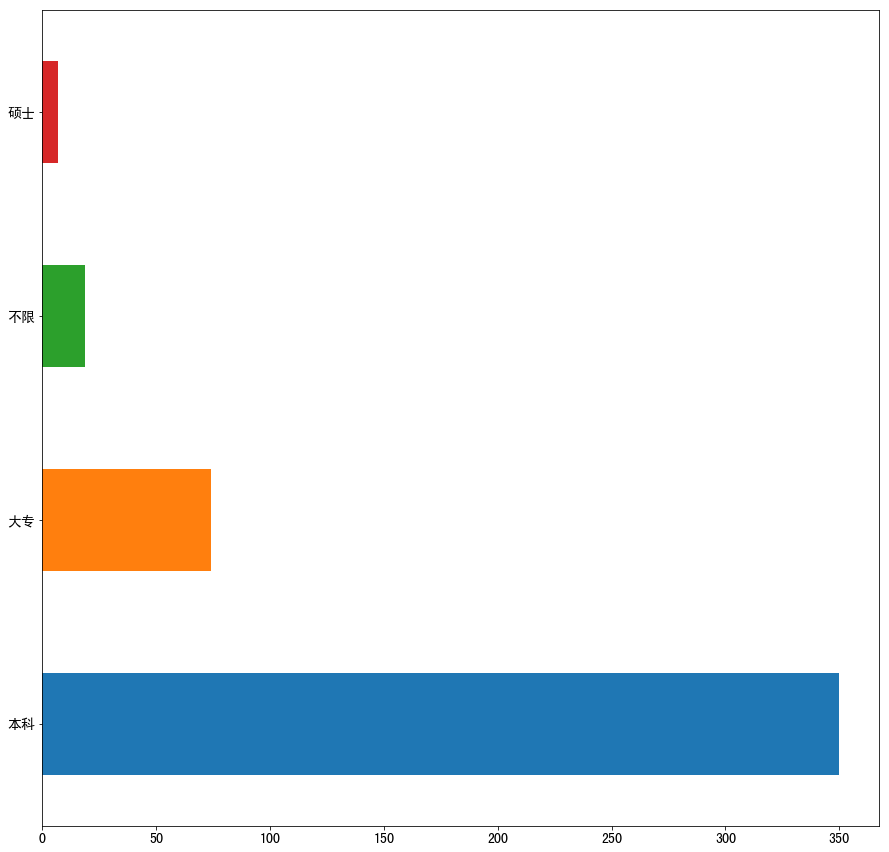

In [7]:
df['education'].value_counts().plot(kind='barh',rot=0)
plt.show()

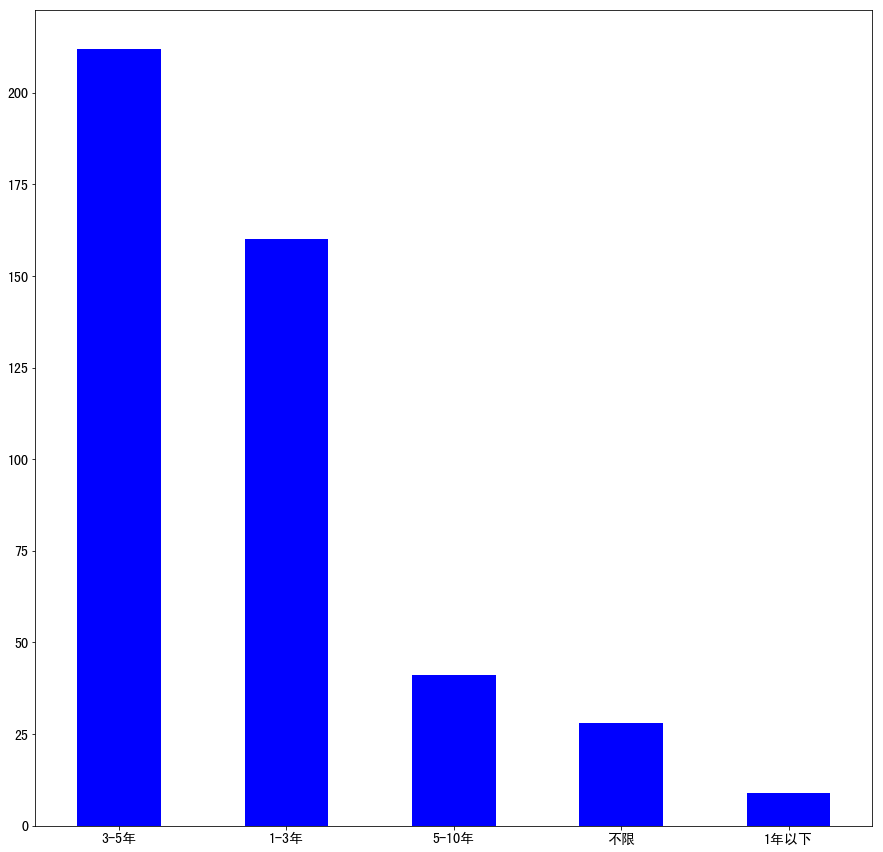

In [8]:
df['workYear'].value_counts().plot(kind='bar',rot=0,color='b')
plt.show()

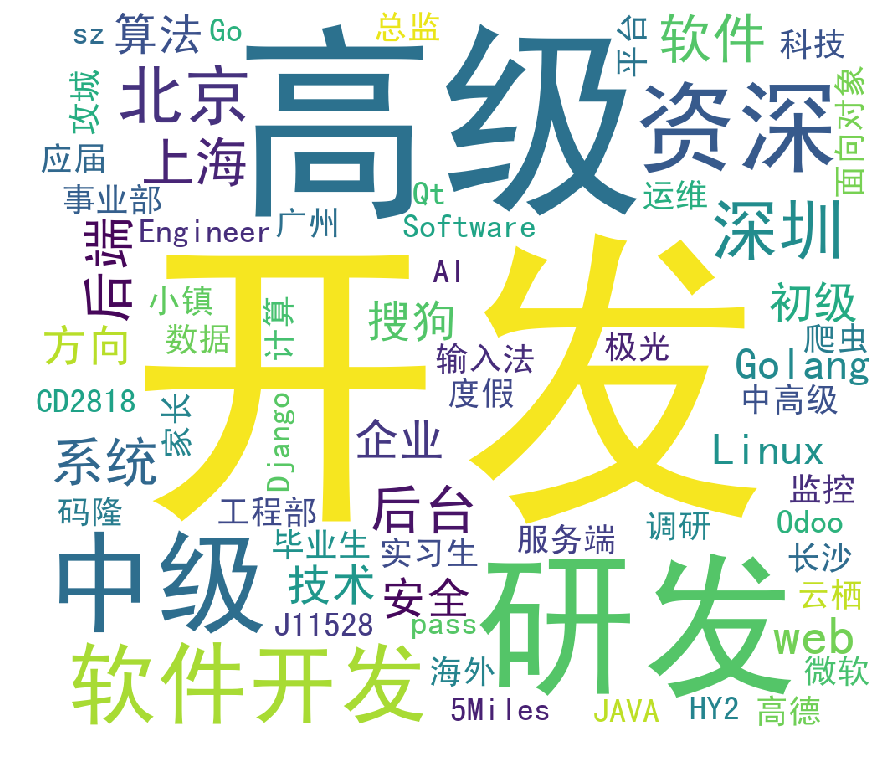

In [14]:
final = ''  
stopwords = ['PYTHON','python','Python','工程师','（','）','/'] # 停止词
for n in range(df.shape[0]):    
    seg_list = list(jieba.cut(df['positionName'][n]))    
    for seg in seg_list:          
        if seg not in stopwords:                  
            final = final + seg + ' '
# final 得到的词汇

font = r"/Users/jun/.pyenv/versions/3.6.3/envs/spider_py3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf"
wordcloud = WordCloud(font_path = font,background_color="white",width=1000, height=860, margin=2).generate(final)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

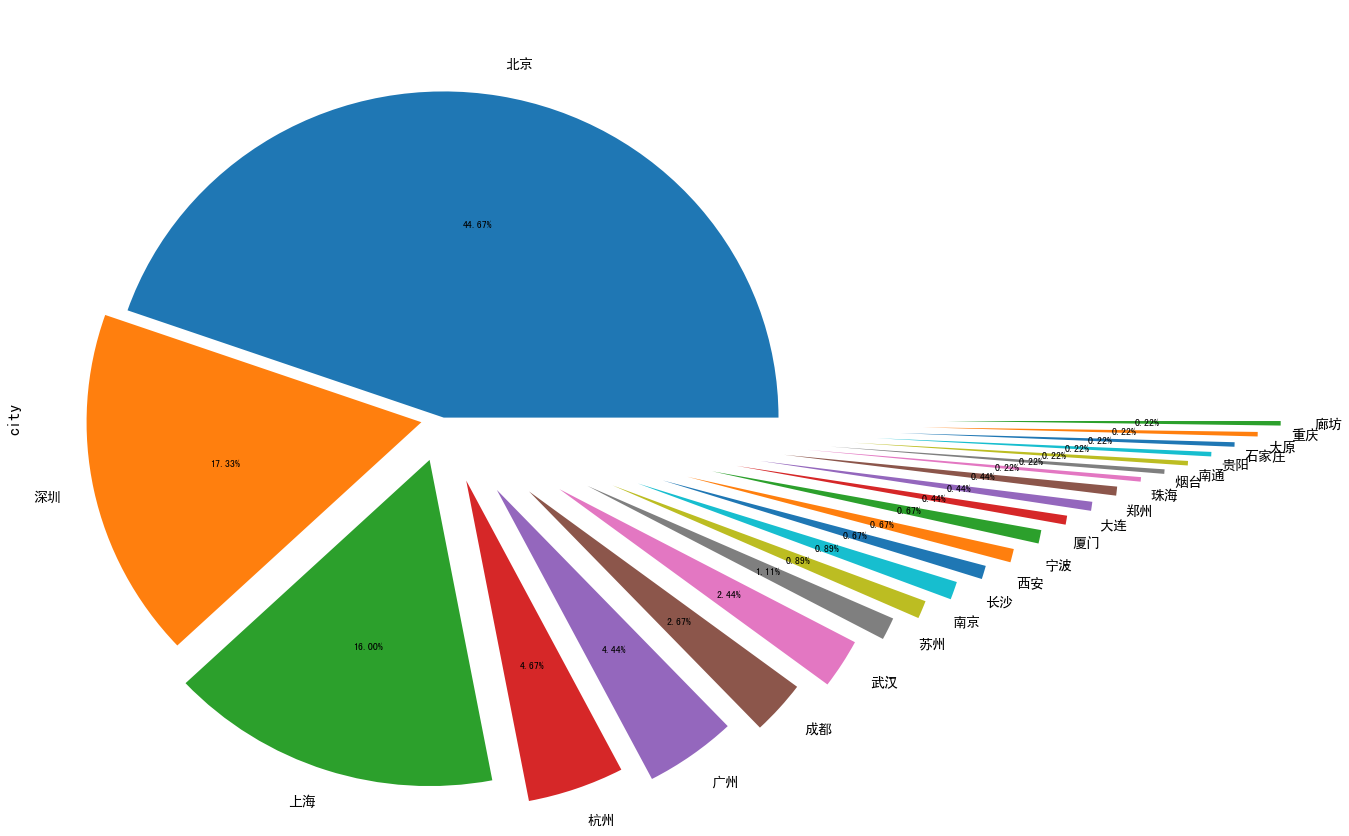

In [26]:
df['city'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=np.linspace(0,1.5,23))
plt.show()

23